# Rotación Solar
Juan David Galan Vargas - 202111470

# Prueba 1: Velocidad Radial del Sol

## Importar Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Proyecto Experimental\Datos_pixeles.csv")
# Extract column names and data
x_column, y_column = df.columns
x_values = df[x_column]
y_values = df[y_column]


c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#def generate_parabola(x,h,k, a):
#    return a * (x - h)**2 + k

In [3]:
#def generate_parabola(x, x0, a, y0, sigma):
#    return y0 + a * -np.exp(-(x - x0)**2 / (2 * sigma**2))

In [4]:
from scipy.special import wofz
def generate_parabola(x, center,base, amplitude, sigma, gamma):
    #Parameters:
    #- x: Independent variable.
    #- amplitude: Peak intensity.
    #- center: Center of the peak.
    #- sigma: Width of the Gaussian component.
    #- gamma: Width of the Lorentzian component.
    z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    return amplitude * np.real(wofz(z)).astype(float)+base

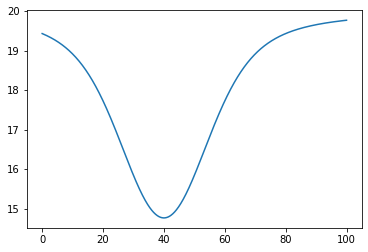

In [5]:
hori=np.linspace(0,100,1000)
verti=generate_parabola(hori,40,20,-10,10,10)
plt.plot(hori,verti)

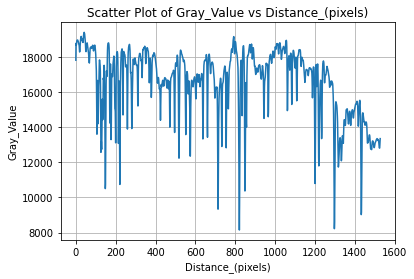

In [6]:
plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()


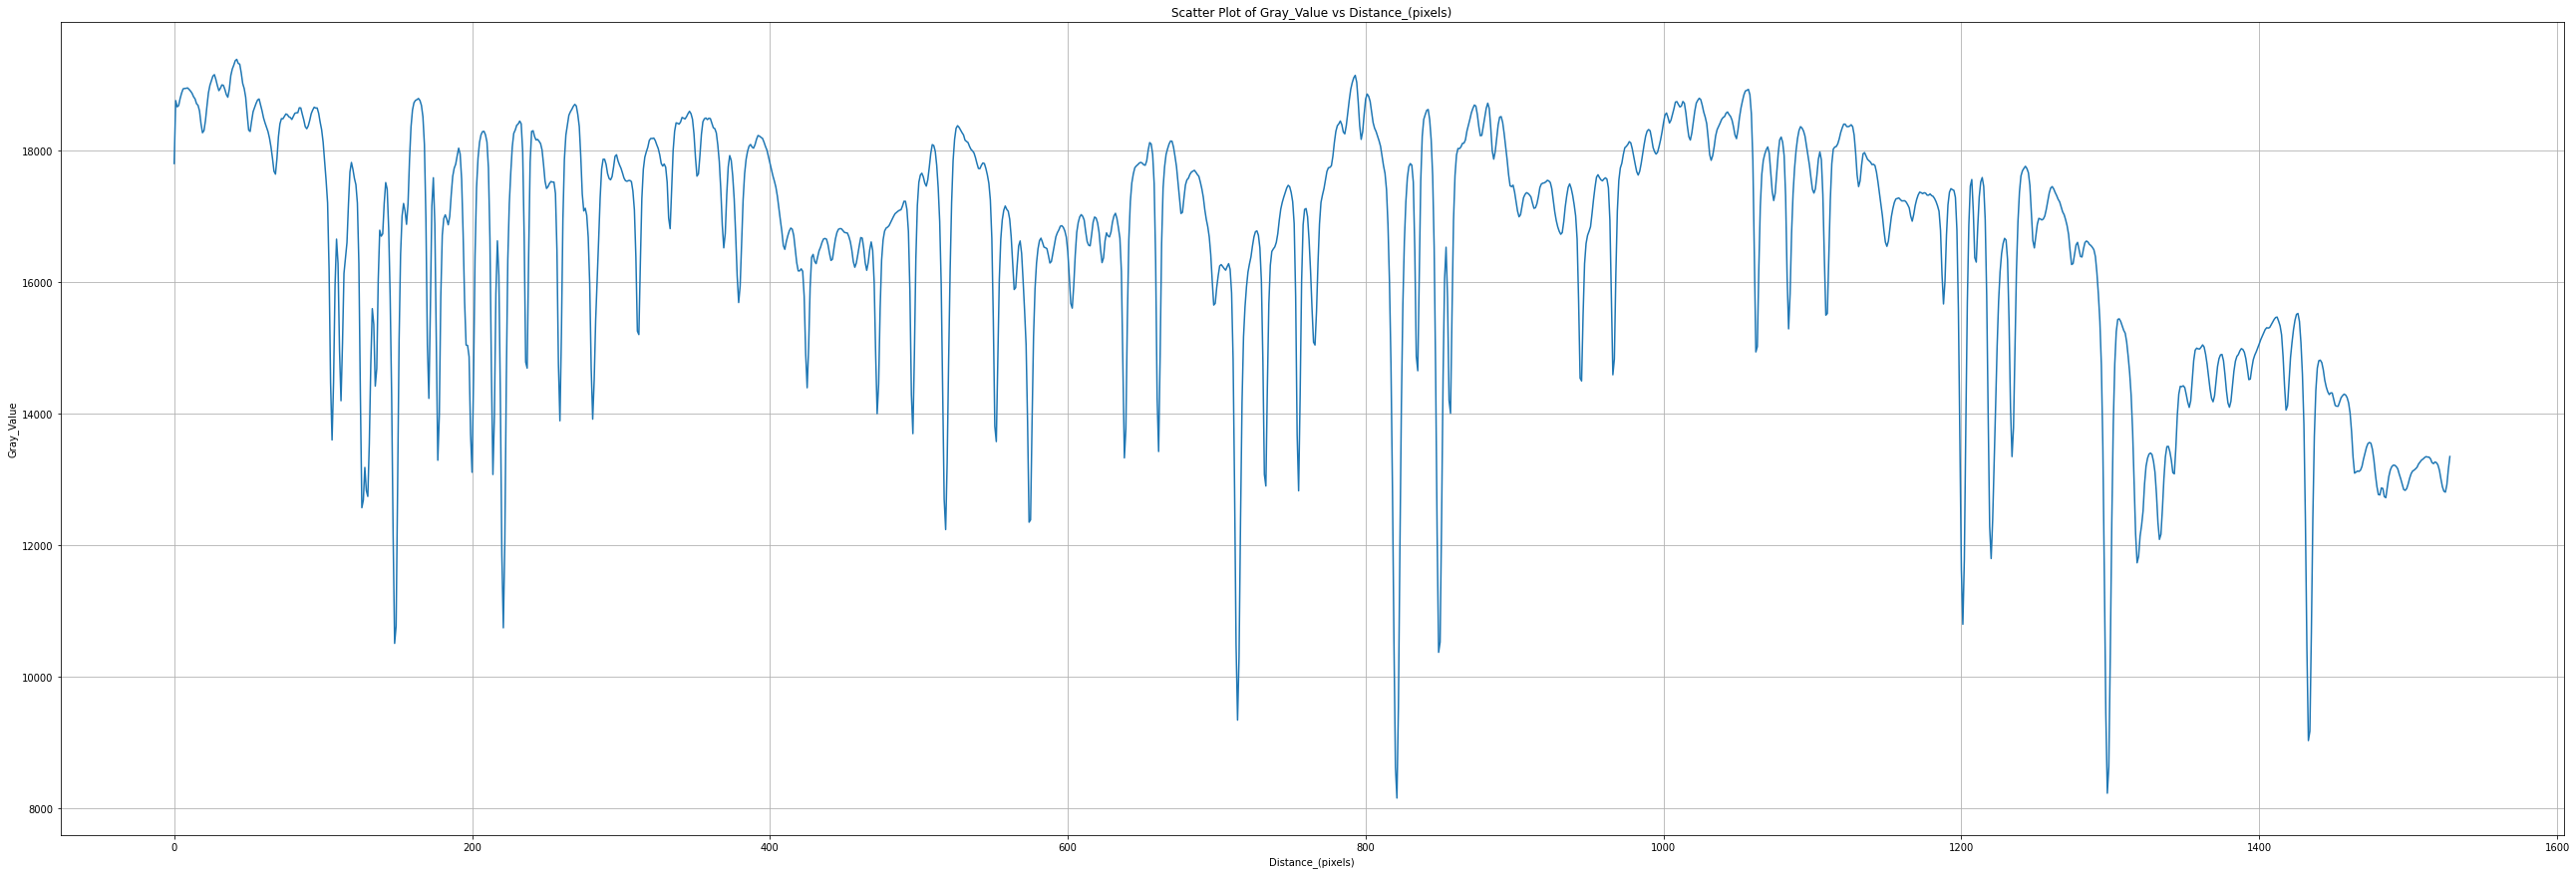

In [7]:
fig,ax = plt.subplots(ncols=1,figsize=(45,15),sharey=True)

plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()

In [8]:
len(x_values)

1529

Confirmar Escala

In [9]:
D="Gray_Value"
df.head()

,Distance_(pixels),Gray_Value
0,0,17803.834
1,1,18761.166
2,2,18666.000
3,3,18686.000
4,4,18793.834


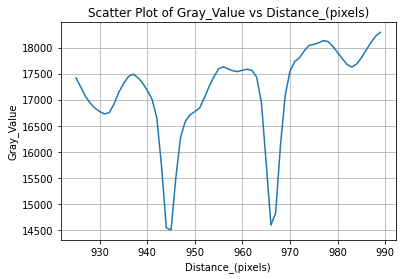

,Distance_(pixels),Gray_Value
945,945.0,14496.167
966,966.0,14590.000


In [10]:
plt.plot(x_values[925:990], y_values[925:990])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()
dfb=df.iloc[925:990]
local_minima = []
for i in range(926, 988):
    if dfb[D][i] < dfb[D][i - 1] and dfb[D][i] < dfb[D][i + 1]:
        if dfb[D][i] <16000:
            local_minima.append(dfb.iloc[i-925])

# Convert the list of local minima to a DataFrame
df3 = pd.DataFrame(local_minima)
df3

In [11]:
PIXELES=[]

# Ajuste Pixeles

In [12]:
def RESIDUALES(X,y,params):
    residuals =  y - generate_parabola(X,*params)
    ss_residual = np.sum(residuals**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residual / ss_total)
    print(r2)
    centro=params[0]
    print(centro)
    horizontal=np.linspace(X[0],X[-1],100)
    plt.plot(horizontal,generate_parabola(horizontal,*params))

0.9995677471169139
236.56679568981838


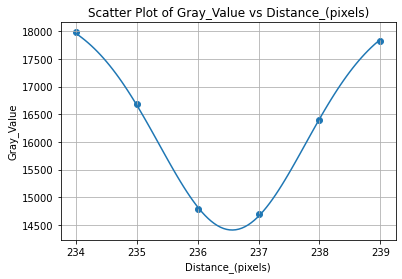

In [13]:
plt.scatter(x_values[234:240], y_values[234:240])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[234:240]
y=list(y_values)
y=y[234:240]
params, covariance = curve_fit(generate_parabola, X, y,p0=[236.5,18000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)


0.999294423346917
258.8564563758234


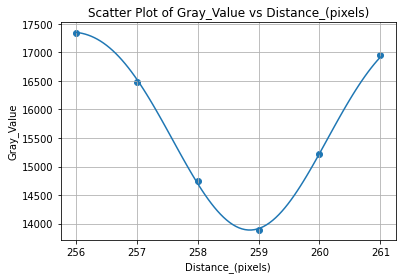

In [14]:
plt.scatter(x_values[256:262], y_values[256:262])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[256:262]
y=list(y_values)
y=y[256:262]
params, covariance = curve_fit(generate_parabola, X, y,p0=[259,17000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.978549468840902
281.23269553751163


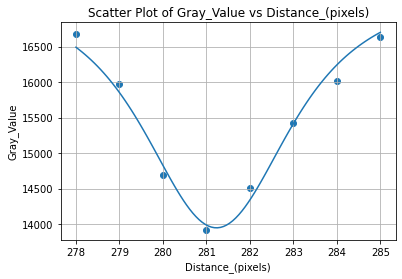

In [15]:
plt.scatter(x_values[278:286], y_values[278:286])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[278:286]
y=list(y_values)
y=y[278:286]
params, covariance = curve_fit(generate_parabola, X, y,p0=[281,16500,-2500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9909832586801468
944.6105677264255


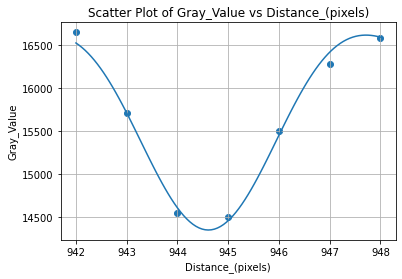

In [16]:
plt.scatter(x_values[942:949], y_values[942:949])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[942:949]
y=list(y_values)
y=y[942:949]
params, covariance = curve_fit(generate_parabola, X, y,p0=[945,16500,-2000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9998434645198263
966.3739821691219


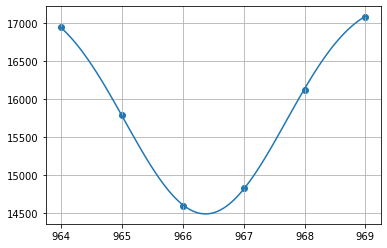

In [17]:
plt.scatter(x_values[964:970], y_values[964:970])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[964:970]
y=list(y_values)
y=y[964:970]
params, covariance = curve_fit(generate_parabola, X, y,p0=[966.5,17000,-2500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

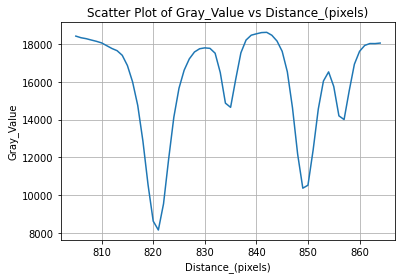

In [18]:
plt.plot(x_values[805:865], y_values[805:865])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()


1.0
834.6037887922462


C:\Users\juang\AppData\Local\Temp/ipykernel_6580/1672778102.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,-3000,10,10])


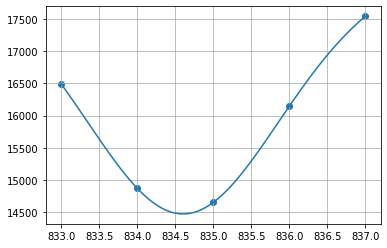

In [19]:
plt.scatter(x_values[833:838], y_values[833:838])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[833:838]
y=list(y_values)
y=y[833:838]
params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9868519062392619
856.5609551157906


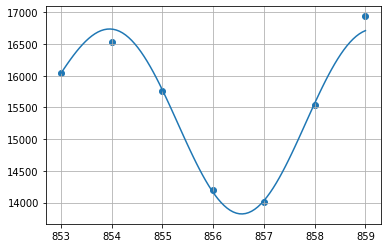

In [20]:
plt.scatter(x_values[853:860], y_values[853:860])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[853:860]
y=list(y_values)
y=y[853:860]
params, covariance = curve_fit(generate_parabola, X, y,p0=[857,17000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

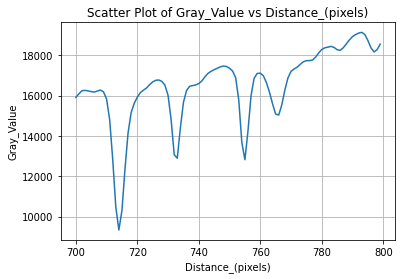

In [21]:
plt.plot(x_values[700:800], y_values[700:800])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9981623499207027
732.6247260947055


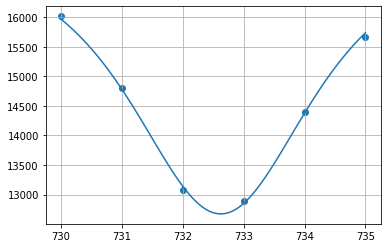

In [22]:
plt.scatter(x_values[730:736], y_values[730:736])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[730:736]
y=list(y_values)
y=y[730:736]
params, covariance = curve_fit(generate_parabola, X, y,p0=[733,15500,-2500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9984461857050134
754.8845496148025


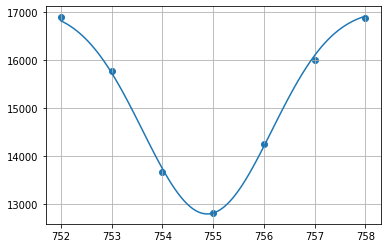

In [23]:
plt.scatter(x_values[752:759], y_values[752:759])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[752:759]
y=list(y_values)
y=y[752:759]
params, covariance = curve_fit(generate_parabola, X, y,p0=[755,16000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

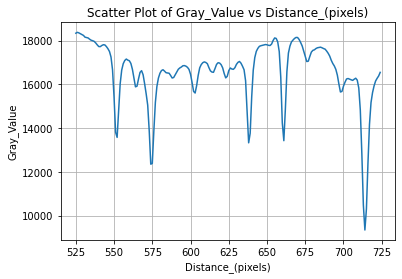

In [24]:
plt.plot(x_values[525:725], y_values[525:725])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9932557173596052
551.7033923085168


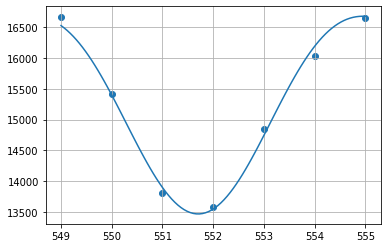

In [25]:
plt.scatter(x_values[549:556], y_values[549:556])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[549:556]
y=list(y_values)
y=y[549:556]
params, covariance = curve_fit(generate_parabola, X, y,p0=[551.5,16500,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9993919435718902
574.4867021447963


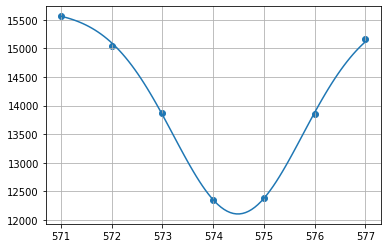

In [26]:
plt.scatter(x_values[571:578], y_values[571:578])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[571:578]
y=list(y_values)
y=y[571:578]
params, covariance = curve_fit(generate_parabola, X, y,p0=[574.5,15000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

1.0
638.2973905987908


C:\Users\juang\AppData\Local\Temp/ipykernel_6580/2372253180.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[638,16000,-2500,10,10])


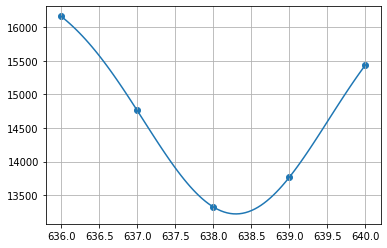

In [27]:
plt.scatter(x_values[636:641], y_values[636:641])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[636:641]
y=list(y_values)
y=y[636:641]
params, covariance = curve_fit(generate_parabola, X, y,p0=[638,16000,-2500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9984162256697249
660.8704301920511


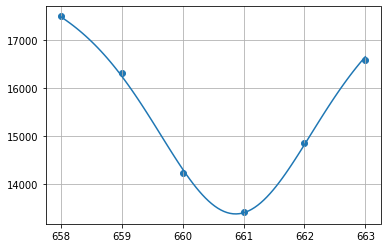

In [28]:
plt.scatter(x_values[658:664], y_values[658:664])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[658:664]
y=list(y_values)
y=y[658:664]
params, covariance = curve_fit(generate_parabola, X, y,p0=[661,17500,-4000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

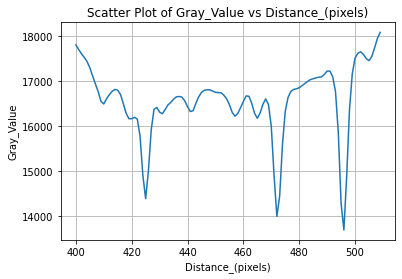

In [29]:
plt.plot(x_values[400:510], y_values[400:510])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9993082707661793
424.9321060453354


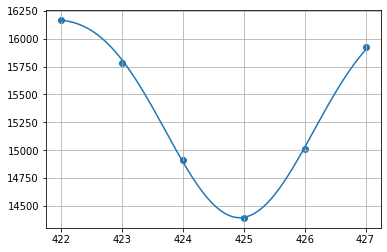

In [30]:
plt.scatter(x_values[422:428], y_values[422:428])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[422:428]
y=list(y_values)
y=y[422:428]
params, covariance = curve_fit(generate_parabola, X, y,p0=[425,16250,-1600,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.999845386628321
472.2035145783263


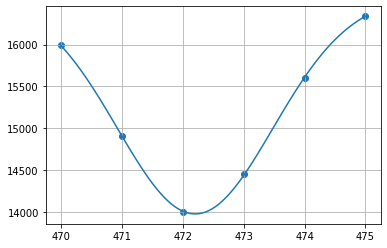

In [31]:
plt.scatter(x_values[470:476], y_values[470:476])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[470:476]
y=list(y_values)
y=y[470:476]
params, covariance = curve_fit(generate_parabola, X, y,p0=[472,16000,-2000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

1.0
495.80585148782455


C:\Users\juang\AppData\Local\Temp/ipykernel_6580/225718931.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[496,16500,-3000,10,10])


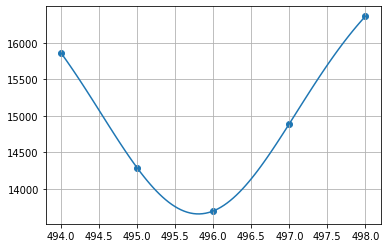

In [32]:
plt.scatter(x_values[494:499], y_values[494:499])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[494:499]
y=list(y_values)
y=y[494:499]
params, covariance = curve_fit(generate_parabola, X, y,p0=[496,16500,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9800660859113779
1084.236569715636


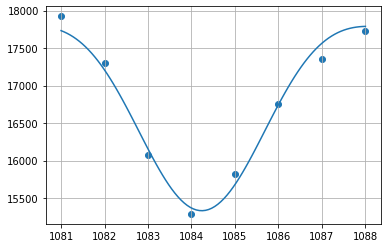

In [33]:
plt.scatter(x_values[1081:1089], y_values[1081:1089])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1081:1089]
y=list(y_values)
y=y[1081:1089]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1084,18000,-3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9999537705490903
1188.071090375473


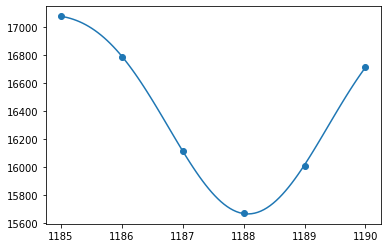

In [34]:
plt.scatter(x_values[1185:1191], y_values[1185:1191])
X= list(df["Distance_(pixels)"])
X=X[1185:1191]
y=list(y_values)
y=y[1185:1191]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1188,17200,-1500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9891300878054025
1209.6887870328953


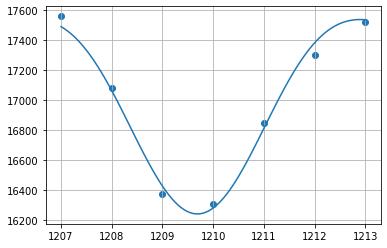

In [35]:
plt.scatter(x_values[1207:1214], y_values[1207:1214])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1207:1214]
y=list(y_values)
y=y[1207:1214]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1210,17600,-1500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

In [36]:
PIXELES.sort()
PIXELES

[236.56679568981838,
 258.8564563758234,
 281.23269553751163,
 424.9321060453354,
 472.2035145783263,
 495.80585148782455,
 551.7033923085168,
 574.4867021447963,
 638.2973905987908,
 660.8704301920511,
 732.6247260947055,
 754.8845496148025,
 834.6037887922462,
 856.5609551157906,
 944.6105677264255,
 966.3739821691219,
 1084.236569715636,
 1188.071090375473,
 1209.6887870328953]

In [37]:
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Pix = [238, 260.5, 282.5, 426.6, 473.7, 497, 553, 576, 640, 662, 734, 756, 836, 858, 946, 968, 1085, 1190, 1211]
dif=[]
for i in range(len(PIXELES)):
    d=PIXELES[i]-Pix[i]
    dif.append(d)
Comparacion=  pd.DataFrame({
    'Posición Angstrom': moore,
    'Pixeles Estimados': Pix,
    'Pixeles Calculados': PIXELES,
    "Diferencia": dif
})

In [38]:
Comparacion

,Posición Angstrom,Pixeles Estimados,Pixeles Calculados,Diferencia
0,6281.178,238.0,236.566796,-1.433204
1,6281.956,260.5,258.856456,-1.643544
2,6282.726,282.5,281.232696,-1.267304
3,6287.749,426.6,424.932106,-1.667894
4,6289.398,473.7,472.203515,-1.496485
5,6290.221,497.0,495.805851,-1.194149
6,6292.162,553.0,551.703392,-1.296608
7,6292.958,576.0,574.486702,-1.513298
8,6295.178,640.0,638.297391,-1.702609
9,6295.960,662.0,660.870430,-1.129570


# Escala Pixeles -Angstrom

In [39]:
print(PIXELES)

[236.56679568981838, 258.8564563758234, 281.23269553751163, 424.9321060453354, 472.2035145783263, 495.80585148782455, 551.7033923085168, 574.4867021447963, 638.2973905987908, 660.8704301920511, 732.6247260947055, 754.8845496148025, 834.6037887922462, 856.5609551157906, 944.6105677264255, 966.3739821691219, 1084.236569715636, 1188.071090375473, 1209.6887870328953]


0.9999998776741531


C:\Users\juang\AppData\Local\Temp/ipykernel_6580/3032615193.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params_escala, covariance = curve_fit(escala, x,moore)


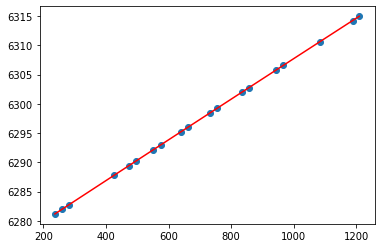

In [40]:
def escala(x, A,a,B,b,C,c,D):
    return (A*(x+a))+(B*((x+b)**2))+D#+(C*((x+c)**3))
x=PIXELES
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Rowland1=[6287.285,6289.140,6290.221,6292.162,6292.958,6294.650,6295.96,6298.457,6299.228,6302,6302.764,6305.314,6306.565,6310.636]
Rowland2=[6287.945,6289.95,6290.221,6292.614,6292.958,6295.650,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636]
params_escala, covariance = curve_fit(escala, x,moore)
plt.scatter(x, moore)
y=[]
for i in range(len(x)):
    Y=escala(x[i],*params_escala)
    y.append(Y)
plt.plot(x, y,"r")
moore=np.array(moore)
y= np.array(y)
residuals =  moore - y
ss_residual = np.sum(residuals**2)
ss_total = np.sum((moore - np.mean(moore))**2)
r2 = 1 - (ss_residual / ss_total)
print(r2)

In [41]:
#APLICACION ESCALA
print(escala(810,*params_escala))

6301.142875904565


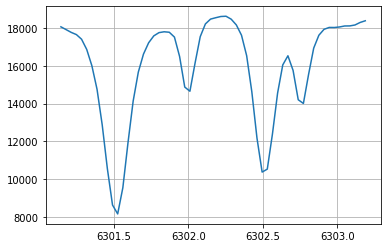

In [42]:
#APLICACION ESCALA
armstrong=[]
for i in range(1529):
    armstrong.append(escala(i,*params_escala))

plt.plot(armstrong[810:870], y_values[810:870])

plt.grid(True)

# Show the plot
plt.show()

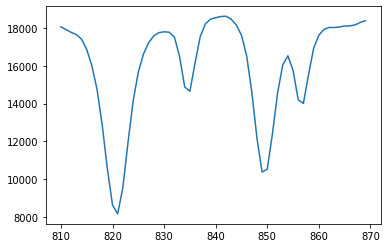

In [43]:
plt.plot(x_values[810:870], y_values[810:870])

# Prueba Ajuste

In [44]:
df["Armstrong"] = armstrong

In [45]:
posiciones=[armstrong,x_values]

In [46]:
Centros=[]

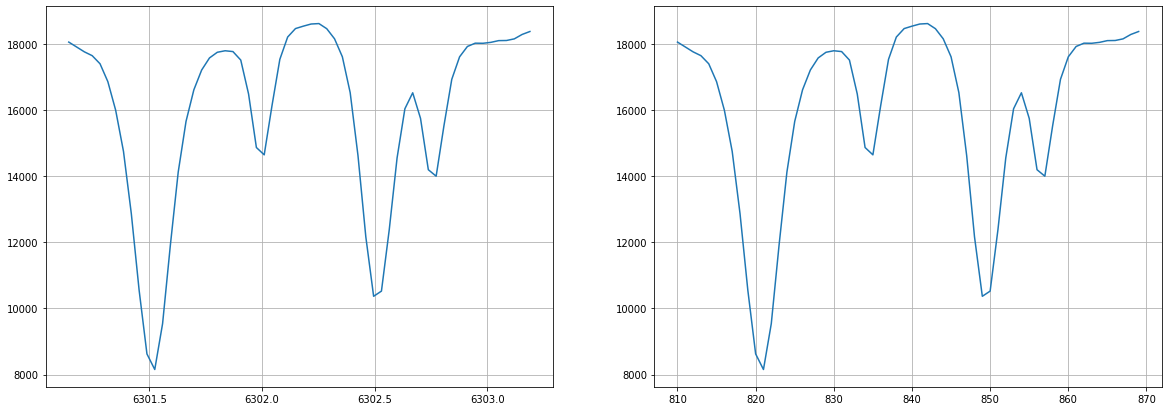

In [47]:
fig,ax = plt.subplots(ncols=2,figsize=(20,7))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot


# Ajuste Curvas Angstrom

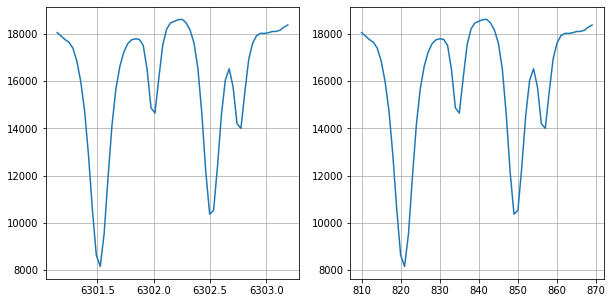

In [48]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

0.999801928425543
820.7122143634051


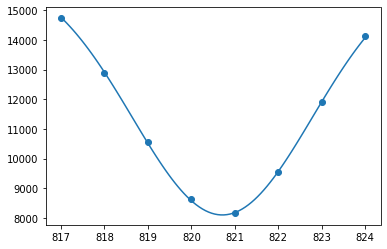

In [49]:
plt.scatter(x_values[817:825], y_values[817:825])
X= list(df["Distance_(pixels)"])
X=X[817:825]
y=list(y_values)
y=y[817:825]
params, covariance = curve_fit(generate_parabola, X, y,p0=[821,15000,-7000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9991251235481219
849.4748242422048


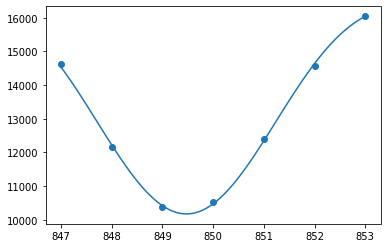

In [50]:
plt.scatter(x_values[847:854], y_values[847:854])
X= list(df["Distance_(pixels)"])
X=X[847:854]
y=list(y_values)
y=y[847:854]
params, covariance = curve_fit(generate_parabola, X, y,p0=[849.5,16000,-6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

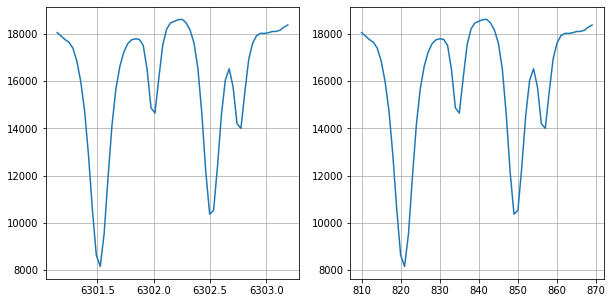

In [51]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

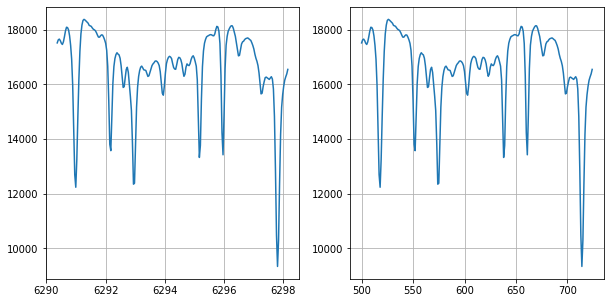

In [52]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][500:725], y_values[500:725])
    plt.grid(True)
# Show the plot

0.9974692367555801
517.8419314437459


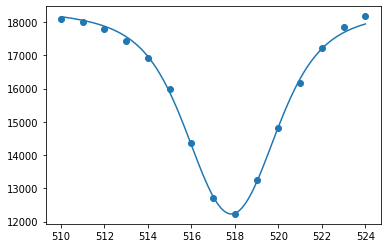

In [53]:
plt.scatter(x_values[510:525], y_values[510:525])
X= list(df["Distance_(pixels)"])
X=X[510:525]
y=list(y_values)
y=y[510:525]
params, covariance = curve_fit(generate_parabola, X, y,p0=[518,18000,-6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9979003179483834
714.1085648674048


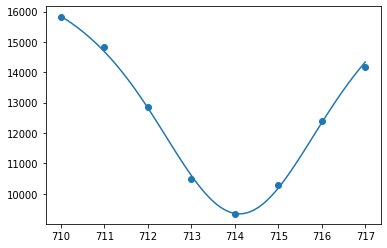

In [54]:
plt.scatter(x_values[710:718], y_values[710:718])
X= list(df["Distance_(pixels)"])
X=X[710:718]
y=list(y_values)
y=y[710:718]
params, covariance = curve_fit(generate_parabola, X, y,p0=[714,16000,-6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

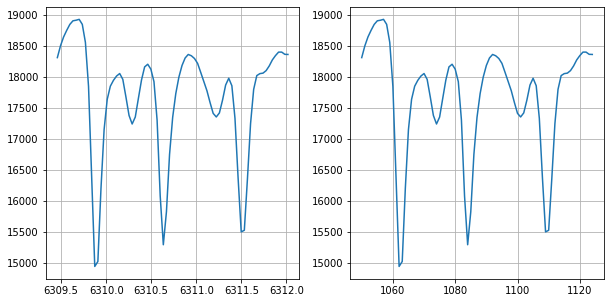

In [55]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1050:1125], y_values[1050:1125])
    plt.grid(True)
# Show the plot

0.9977983232425487
1062.5318471666149


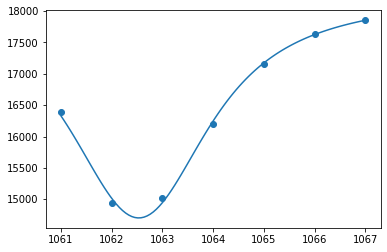

In [56]:
plt.scatter(x_values[1061:1068], y_values[1061:1068])
X= list(df["Distance_(pixels)"])
X=X[1061:1068]
y=list(y_values)
y=y[1061:1068]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1062,18000,-3000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9994168975371066
1109.5181306788877


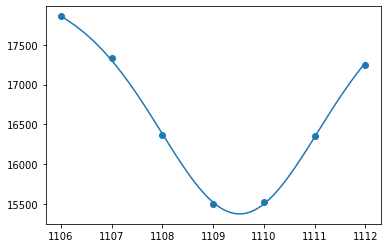

In [57]:
plt.scatter(x_values[1106:1113], y_values[1106:1113])
X= list(df["Distance_(pixels)"])
X=X[1106:1113]
y=list(y_values)
y=y[1106:1113]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1109,18000,-2500,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

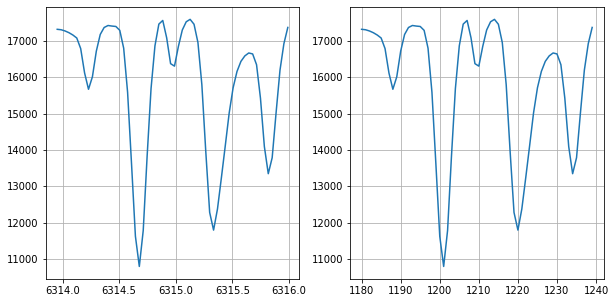

In [58]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1180:1240], y_values[1180:1240])
    plt.grid(True)
# Show the plot

0.9999669943983923
1200.9567391353487


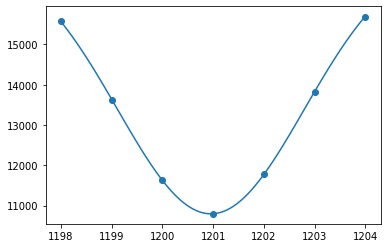

In [59]:
plt.scatter(x_values[1198:1205], y_values[1198:1205])
X= list(df["Distance_(pixels)"])
X=X[1198:1205]
y=list(y_values)
y=y[1198:1205]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1201,15500,-4500,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9988568518745629
1219.9609489139289


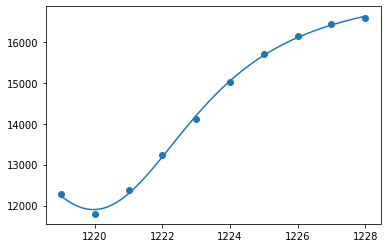

In [60]:
plt.scatter(x_values[1219:1229], y_values[1219:1229])
X= list(df["Distance_(pixels)"])
X=X[1219:1229]
y=list(y_values)
y=y[1219:1229]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1220,16500,-4500,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9998318013390345
1234.1410239901875


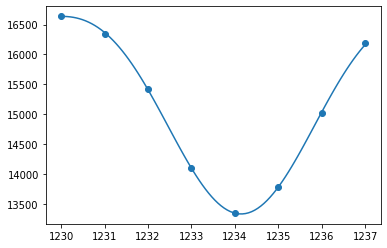

In [61]:
plt.scatter(x_values[1230:1238], y_values[1230:1238])
X= list(df["Distance_(pixels)"])
X=X[1230:1238]
y=list(y_values)
y=y[1230:1238]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1234,16500,-3000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

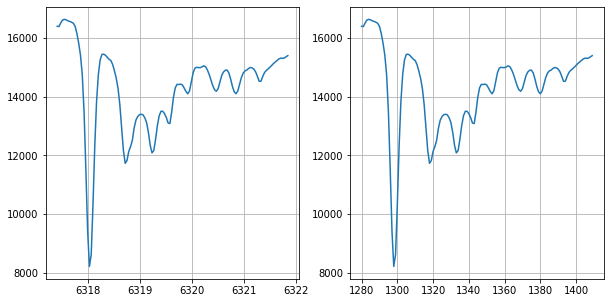

In [62]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1280:1410], y_values[1280:1410])
    plt.grid(True)
# Show the plot

0.9990965348517129
1298.3042951213185


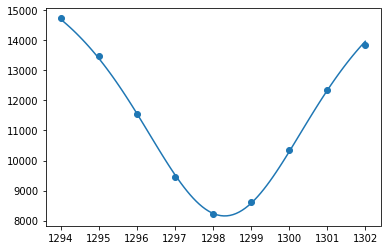

In [63]:
plt.scatter(x_values[1294:1303], y_values[1294:1303])
X= list(df["Distance_(pixels)"])
X=X[1294:1303]
y=list(y_values)
y=y[1294:1303]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1298,14000,-6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9821942027799183
1318.6567056876543


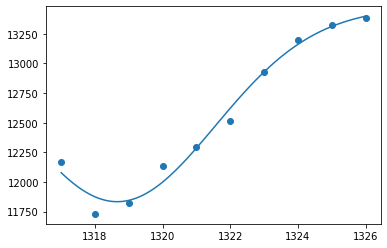

In [64]:
plt.scatter(x_values[1317:1327], y_values[1317:1327])
X= list(df["Distance_(pixels)"])
X=X[1317:1327]
y=list(y_values)
y=y[1317:1327]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1318,13300,-2000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.998947277152908
1333.2353272344328


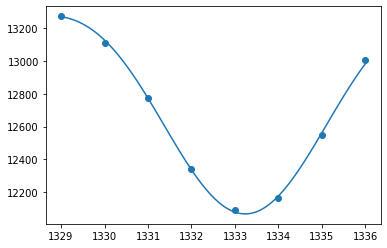

In [65]:
plt.scatter(x_values[1329:1337], y_values[1329:1337])
X= list(df["Distance_(pixels)"])
X=X[1329:1337]
y=list(y_values)
y=y[1329:1337]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1333,13300,-1300,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

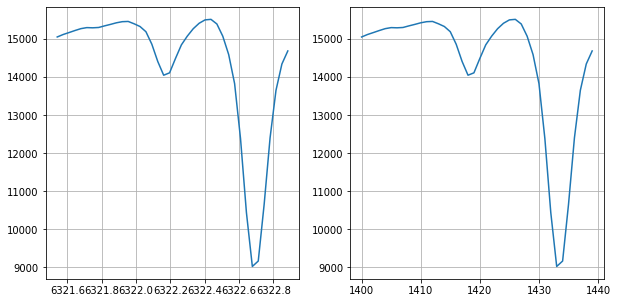

In [66]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1400:1440], y_values[1400:1440])
    plt.grid(True)
# Show the plot

0.9911129415469462
1418.47596489918


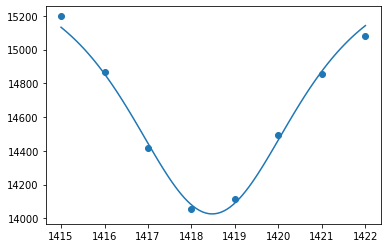

In [67]:
plt.scatter(x_values[1415:1423], y_values[1415:1423])
X= list(df["Distance_(pixels)"])
X=X[1415:1423]
y=list(y_values)
y=y[1415:1423]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1419,15200,-1200,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9983857983968305
1433.4753869069662


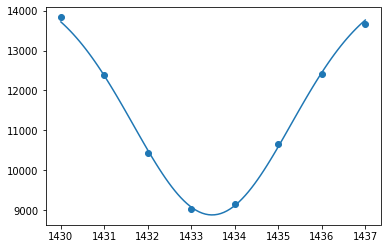

In [68]:
plt.scatter(x_values[1430:1438], y_values[1430:1438])
X= list(df["Distance_(pixels)"])
X=X[1430:1438]
y=list(y_values)
y=y[1430:1438]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1433,14000,-5000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

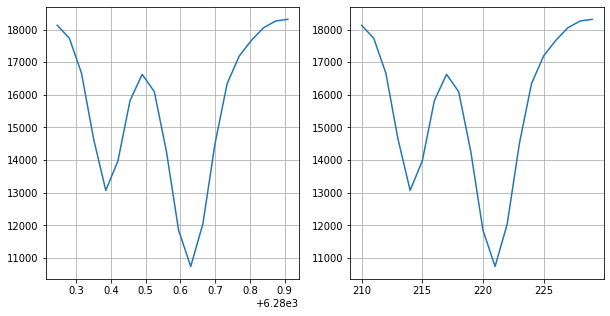

In [69]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][210:230], y_values[210:230])
    plt.grid(True)
# Show the plot

0.9997836688676067
220.94522605156672


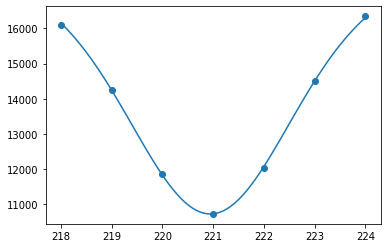

In [70]:
plt.scatter(x_values[218:225], y_values[218:225])
X= list(df["Distance_(pixels)"])
X=X[218:225]
y=list(y_values)
y=y[218:225]
params, covariance = curve_fit(generate_parabola, X, y,p0=[221,16000,-5000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

# Calculo Velocidades

In [71]:
Lineas_abs_angstrom=[]
for i in range(len(Centros)):
    a=escala(Centros[i],*params_escala)
    Lineas_abs_angstrom.append(a)

In [72]:
Lineas_abs_angstrom.sort()
print(Lineas_abs_angstrom)


[6280.627770606764, 6290.986458172741, 6297.813399968896, 6301.514572871873, 6302.512346430019, 6309.892225651005, 6311.51711615145, 6314.676550396602, 6315.3327432045835, 6315.822263365557, 6318.03620898449, 6318.738097150519, 6319.240756885366, 6322.177962637524, 6322.694487156185]


In [73]:
# Separación de otro elementos del Hierro
indices_to_remove = [6-1, 8-1, 13-1, 14-1,12-1]
Hierros = [Lineas_abs_angstrom[i] for i in range(len(Lineas_abs_angstrom)) if i not in indices_to_remove]
print(Hierros)

[6280.627770606764, 6290.986458172741, 6297.813399968896, 6301.514572871873, 6302.512346430019, 6311.51711615145, 6315.3327432045835, 6315.822263365557, 6318.03620898449, 6322.694487156185]


In [74]:
#Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.3063,6315.8110,6318.0171,6322.6851]
#Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.3056,6315.8107,6318.0176,6322.6847]

#La linea 6315.348947813029 resulta en una velocidad atipica respecto al resto de velocidades, se presenta la opción de realizar los calculos estadisticos ignorando este valor atipico con fines comparativos: 

Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.8110,6318.0171,6322.6851]
Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.8107,6318.0176,6322.6847]
Hierros.pop(6)

6315.3327432045835

Datos tomados del: NIST Atomic Spectra Database Lines Data

In [75]:
from scipy.constants import c
def vel_tan(real, doppler):
    #v= ((real/doppler)-1)*c
    v=((doppler-real)/real)*c
    return v
def tiempo(vt):
    vt_km= vt/1000 #metros a kilometros
    ra_sol= 1391016/2
    tiempo_s= (2*np.pi*ra_sol)/np.abs(vt_km)
    tiempo_d= tiempo_s/ (60*60*24)   #segundos a dias
    return tiempo_d


In [76]:
velocidades_Air=[]
velocidades_Ritz=[]

In [77]:
#Fe1
for i in range(len(Hierros)):
    vt1=vel_tan(Reales_Air_Hierro[i], Hierros[i])
    vt2=vel_tan(Reales_Ritz_Hierro[i], Hierros[i])
    velocidades_Air.append(vt1)
    velocidades_Ritz.append(vt2)
    print(vt1)
    print(vt2)
    print("--------------------")


475.92654173781693
528.4328867661501
--------------------
984.4536722361021
1032.1082772204995
--------------------
985.3761232761105
1004.4173001850961
--------------------
655.2412264174172
712.3310873449918
--------------------
910.7435954459952
910.7435954459952
--------------------
817.7568632367021
855.7564916522851
--------------------
534.6379183507077
548.8780376279739
--------------------
906.7290163254175
883.0037449056219
--------------------
445.0954905674922
464.06166821163356
--------------------


Calculo Estadistico para Lineas de Hierro

In [78]:
promedio_hierro_air=sum(velocidades_Air)/len(velocidades_Air)
promedio_hierro_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
std_hierro_air=np.std(velocidades_Air)
std_hierro_ritz=np.std(velocidades_Ritz)
print("Promedio Air: "+str(promedio_hierro_air)+" .Desviación Estandar: "+str(std_hierro_air))
print("Promedio Ritz: "+str(promedio_hierro_Ritz)+" .Desviación Estandar: "+str(std_hierro_ritz))
print("Promedio General: "+str((promedio_hierro_Ritz+promedio_hierro_air)/2))

Promedio Air: 746.217827510418 .Desviación Estandar: 207.81355230777692
Promedio Ritz: 771.0814543733608 .Desviación Estandar: 202.14077448578945
Promedio General: 758.6496409418894


Calculo Estadistico para lineas de otros elementos

In [79]:
#Sc
Real_Air=6309.88
Doppler=Lineas_abs_angstrom[5]
vt1=vel_tan(Real_Air, Doppler)
velocidades_Air.append(vt1)
print(vt1)

580.8601693540908


In [80]:
#Ni
Real_Air=6314.66
Real_Ritz=6314.659
Doppler=Lineas_abs_angstrom[7]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

785.7404956296886
833.2162569972576


In [81]:
#Mg
Real_Air=6319.236
Real_Ritz=6319.237
Doppler=Lineas_abs_angstrom[12]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

225.6725902182928
178.231311511122


In [82]:
#Ni
Real_Ritz=6322.166 	
Doppler=Lineas_abs_angstrom[13]
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Ritz.append(vt2)
print(vt2)

567.2594657186507


In [83]:
len(velocidades_Air)

12

In [84]:
promedio_otros_air=sum(velocidades_Air[10:])/len(velocidades_Air[10:])
promedio_otros_Ritz=sum(velocidades_Ritz[10:])/len(velocidades_Ritz[10:])
std_otros_air=np.std(velocidades_Air[10:])
std_otros_ritz=np.std(velocidades_Ritz[10:])
print("Promedio Air: "+str(promedio_otros_air)+" .Desviación Estandar: "+str(std_otros_air))
print("Promedio Ritz: "+str(promedio_otros_Ritz)+" .Desviación Estandar: "+str(std_otros_ritz))
print("Promedio General: "+str((promedio_otros_Ritz+promedio_otros_air)/2))

Promedio Air: 505.7065429239907 .Desviación Estandar: 280.03395270569786
Promedio Ritz: 372.74538861488634 .Desviación Estandar: 194.51407710376438
Promedio General: 439.2259657694385


# Calculos Estadisticos Generales

In [85]:
#Promedio
promedio_Air=sum(velocidades_Air)/len(velocidades_Air)
promedio_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
print(promedio_Air)
print(promedio_Ritz)

692.3528085663196
709.8700102989397


In [86]:
promedio_ge=(sum(velocidades_Air)+sum(velocidades_Ritz))/(len(velocidades_Ritz)+len(velocidades_Air))
promedio_ge

701.1114094326298

In [87]:
#Desviación Estandar
std_air=np.std(velocidades_Air)
std_ritz=np.std(velocidades_Ritz)
print(std_air)
print(std_ritz)

233.40478251108144
244.89136578072217


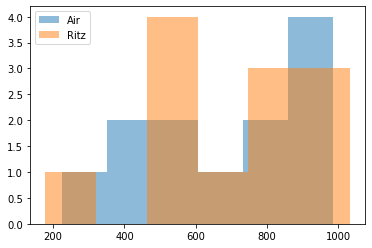

In [88]:
plt.hist(velocidades_Air,bins=6,label="Air",alpha=0.5)
plt.hist(velocidades_Ritz,bins=6,label="Ritz",alpha=0.5)
plt.legend()